rerun on 2021-12-07 after correcting for salinity of media samples

In [1]:
setwd("/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/")
library(ggplot2)
theme_set(theme_bw())
library(dplyr)

reg_dat <- read.csv(file="/mnt/scgc/simon/microg2p/analyses/JdF_analysis/analysis/O2_consumption_calculation/rsg_reg_data.csv", header = TRUE, row.names=1) #Read in the Pure Culture Regression Datahead()
head(reg_dat)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,resp,resp_simplecorrection,resp_complexcorrection,rsg_gm,Normalized.4Peak.value.Fluorescence...Median,Normalized.4Peak.value.Fluorescence...Arithmatic.Mean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Shewanella14C_T6_1,0.076506020,0.062314677,0.053227057,8.430290,8.671154,18.423058
Shewanella14C_T6_2,0.088157515,0.071804900,0.059923821,10.678354,12.308818,20.498194
ShewanellaLowCarbon_T4_1,0.017742522,0.014451406,0.013953085,6.719600,7.843570,8.912018
ShewanellaLowCarbon_T4_2,0.015855727,0.012914598,0.012594276,5.984600,7.473010,8.590866
ShewanellaLowCarbon_T5_1,0.010084775,0.008214118,0.007991376,6.596018,7.139506,7.930034
ShewanellaLowCarbon_T5_2,0.009396371,0.007653409,0.007473245,6.243986,8.115314,8.813202


In [2]:


#Do the linear regression, Note log10 transformation of the Respiration data column from the file

modL <- lm(log10(resp_complexcorrection) ~ rsg_gm, data = reg_dat)
summary(modL)


Call:
lm(formula = log10(resp_complexcorrection) ~ rsg_gm, data = reg_dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73012 -0.27196 -0.00087  0.23529  0.88189 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.400298   0.076597  -31.34   <2e-16 ***
rsg_gm       0.084334   0.004949   17.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3847 on 48 degrees of freedom
Multiple R-squared:  0.8582,	Adjusted R-squared:  0.8552 
F-statistic: 290.4 on 1 and 48 DF,  p-value: < 2.2e-16


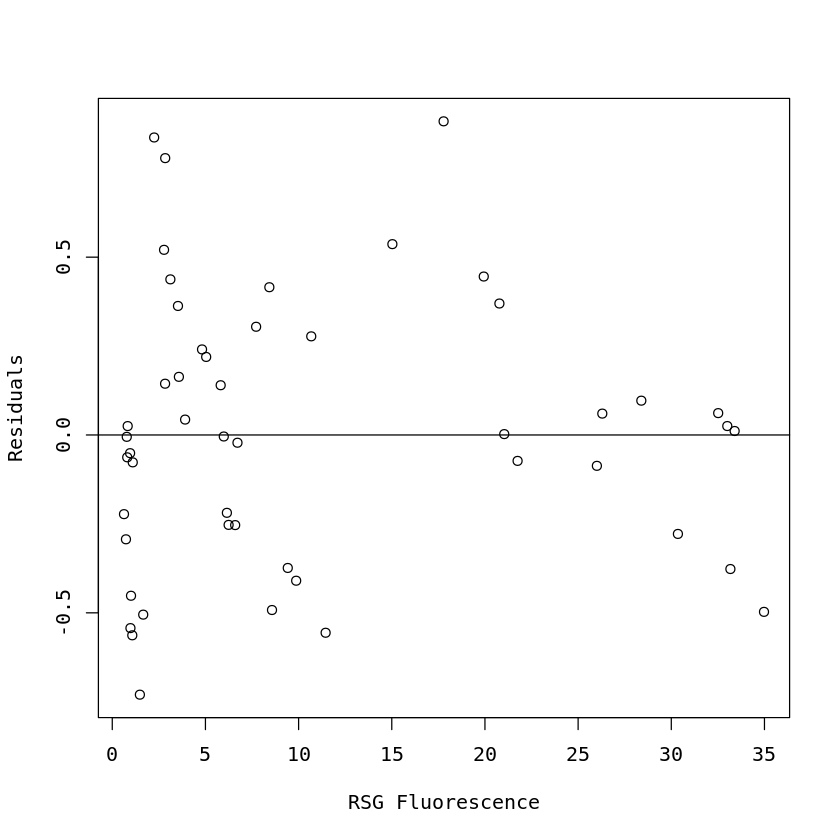

In [3]:

#Plot Residiuals with 0 line as a reference. Note higher variance at lower values. This will be apparent in the predictive interval for the data.

modL.resid = resid(modL) 
plot(reg_dat$rsg_gm, modL.resid, ylab="Residuals", xlab="RSG Fluorescence") 
abline(0, 0)   

In [4]:

#Calculate the Predictive Interval for the regression data

model_p <- as.data.frame(predict(modL, interval=c("prediction")))
## Warning in predict.lm(modL, interval = c("prediction")): predictions on current data refer to _future_ responses
head(model_p)
write.csv(model_p, file = "Rsg_Regressin_Predicitive.csv") #Change title, save for records

Warning message in predict.lm(modL, interval = c("prediction")):
“predictions on current data refer to _future_ responses
”


,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
Shewanella14C_T6_1,-1.689341,-2.470896,-0.9077869
Shewanella14C_T6_2,-1.499754,-2.280926,-0.7185818
ShewanellaLowCarbon_T4_1,-1.833610,-2.615884,-1.0513362
ShewanellaLowCarbon_T4_2,-1.895595,-2.678292,-1.1128988
ShewanellaLowCarbon_T5_1,-1.844032,-2.626372,-1.0616920
ShewanellaLowCarbon_T5_2,-1.873720,-2.656260,-1.0911807


In [5]:

#Confidence interval. Note the fit value is the same but the upper and lower bounds are different.

model_conf <- as.data.frame(predict(modL, interval=c("confidence")))
head(model_conf)
write.csv(model_conf, file = "Rsg_Regressin_Confidence.csv") #Change title, save for records

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
Shewanella14C_T6_1,-1.689341,-1.801445,-1.577238
Shewanella14C_T6_2,-1.499754,-1.609161,-1.390347
ShewanellaLowCarbon_T4_1,-1.833610,-1.950623,-1.716597
ShewanellaLowCarbon_T4_2,-1.895595,-2.015401,-1.775790
ShewanellaLowCarbon_T5_1,-1.844032,-1.961488,-1.726577
ShewanellaLowCarbon_T5_2,-1.873720,-1.992496,-1.754944


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

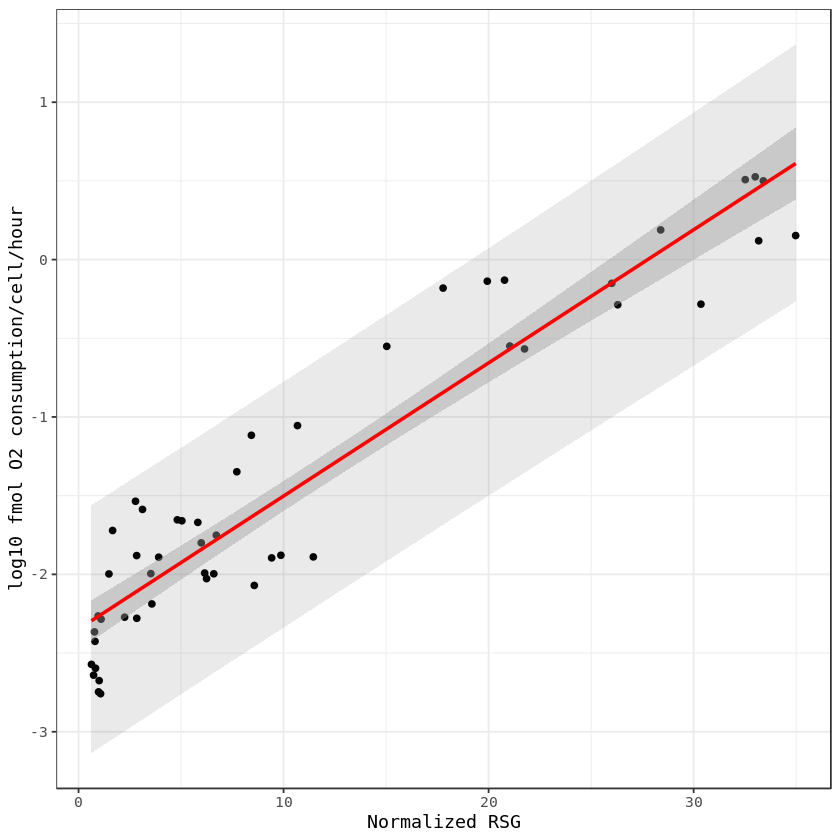

In [6]:

#Make Plot

prelim_lm <- model_p %>%
ggplot(aes(x = reg_dat$rsg_gm, y = log10(reg_dat$resp))) +
geom_point() +
aes(ymin=lwr) +
aes(ymax=upr) +
xlab("Normalized RSG")+
ylab("log10 fmol O2 consumption/cell/hour") +
geom_ribbon(alpha=0.1) +
stat_smooth(method = "lm", col = "red") # This adds the 95% confidence interval (darker grey area around regression line)
prelim_lm

pdf("RSG_O2_conversion.pdf")
print(prelim_lm)
dev.off()

In [7]:

#Read in Data from Sorted SAGs

sagvals <- read.csv(file="/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/CRYO_analysis/tbls/AM-389_Assembly_stats_and_metadata.csv", 
                    header = TRUE)
keep <- (sagvals$gate == "Respiring cells (RSG-positive)")
rsg_vals <- as.data.frame(sagvals$normalized_531_value[keep]) #extract the needed data
names(rsg_vals)[1] <- "rsg_gm" # rename
head(rsg_vals)

,rsg_gm
,<dbl>
1,0.6676648
2,1.9589942
3,2.3655542
4,0.1638872
5,0.6531088
6,1.9386162


In [8]:


pred_resp_CIP <- 10^predict(object=modL,newdata=rsg_vals,interval="prediction")
colnames(pred_resp_CIP) <- c("Predicted respiration rate fmol O2/hr","lower bound","upper bound")
head(pred_resp_CIP)

sagvals$Predicted_respiration_rate_fmol_O2perhr[keep] <- pred_resp_CIP[,1]
sagvals$lower_resp_bound[keep] <- pred_resp_CIP[,2]
sagvals$upper_resp_bound[keep] <- pred_resp_CIP[,3]
write.csv(sagvals, file = "/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/CRYO_analysis/tbls/AM-379_predicted_O2_respiration_rates.csv",
         row.names=FALSE) # Save for records

head(sagvals)

,Predicted respiration rate fmol O2/hr,lower bound,upper bound
1,0.004529067,0.0007383086,0.02778302
2,0.005819841,0.0009521316,0.03557339
3,0.006297929,0.0010314089,0.03845605
4,0.004106987,0.0006684815,0.02523233
5,0.004516283,0.0007361930,0.02770580
6,0.005796857,0.0009483213,0.03543477


,X,name,Plate,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,⋯,FACS_date,gate,depth..m.,sample,slope,intercept,normalized_531_value,Predicted_respiration_rate_fmol_O2perhr,lower_resp_bound,upper_resp_bound
,<int>,<fct>,<fct>,<fct>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,AM-379-A01,AM-379,1 cell,NA,211209_NB502014_0167_AHK5HTBGXK,1011904,341776,87822,40.50489,⋯,210928,Respiring cells (RSG-positive),1,AM-379-A01,0.03564211,-0.2481645,0.6676648,0.004529067,0.0007383086,0.02778302
2,1,AM-379-A02,AM-379,1 cell,NA,211209_NB502014_0167_AHK5HTBGXK,1283000,820061,120078,34.92789,⋯,210928,Respiring cells (RSG-positive),1,AM-379-A02,0.03564211,-0.2481645,1.9589942,0.005819841,0.0009521316,0.03557339
3,2,AM-379-A03,AM-379,1 cell,NA,211209_NB502014_0167_AHK5HTBGXK,638518,934996,111730,49.72011,⋯,210928,Respiring cells (RSG-positive),1,AM-379-A03,0.03564211,-0.2481645,2.3655542,0.006297929,0.0010314089,0.03845605
4,3,AM-379-A04,AM-379,1 cell,NA,211209_NB502014_0167_AHK5HTBGXK,1003840,885136,107195,29.50123,⋯,210928,Respiring cells (RSG-positive),1,AM-379-A04,0.03564211,-0.2481645,0.1638872,0.004106987,0.0006684815,0.02523233
5,4,AM-379-A05,AM-379,1 cell,NA,211209_NB502014_0167_AHK5HTBGXK,1454621,845368,70512,41.49861,⋯,210928,Respiring cells (RSG-positive),1,AM-379-A05,0.03564211,-0.2481645,0.6531088,0.004516283,0.0007361930,0.02770580
6,5,AM-379-A06,AM-379,1 cell,NA,211209_NB502014_0167_AHK5HTBGXK,1222296,1119685,301561,36.70238,⋯,210928,Respiring cells (RSG-positive),1,AM-379-A06,0.03564211,-0.2481645,1.9386162,0.005796857,0.0009483213,0.03543477


In [9]:


confidence_rsg <- as.data.frame(predict(lm(log10(resp) ~ rsg_gm, data = reg_dat), rsg_vals, interval=c("confidence"))) #rsg_vals is the new data from the sorted SAGs
head(confidence_rsg)
write.csv(confidence_rsg, file = "AM-379_Sags_Confidence.csv") # Save for records

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,-2.291678,-2.421789,-2.161567
2,-2.182437,-2.305200,-2.059674
3,-2.148044,-2.268615,-2.027472
4,-2.334296,-2.467418,-2.201173
5,-2.292910,-2.423106,-2.162713
6,-2.184161,-2.307035,-2.061286


In [10]:


#Plot sorted sag RSG data with predictive interval. Verticle lines denote RSG values of pure cultures

datpre_lm <- predicted_rsg %>%
ggplot(aes(x = rsg_vals$rsg_gm, y = predicted_rsg$fit)) +
geom_point() +
aes(ymin=lwr) +
aes(ymax=upr) +
geom_ribbon(alpha=0.1) +
geom_vline(xintercept = 35, linetype="solid", color="red", size = 1) + # upper limit of pure culture RSG values 
geom_vline(xintercept = 0.63, linetype="solid", color="red", size = 1)# lower limit of pure culture RSG values
#stat_smooth(method = "lm", col = "red") # Regression line removed
datpre_lm

ERROR: Error in ggplot(., aes(x = rsg_vals$rsg_gm, y = predicted_rsg$fit)): object 'predicted_rsg' not found
